<a href="https://colab.research.google.com/github/sanjanagarai/Dynamic_Portfolio_Optimization/blob/main/StockPricePrediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [ ]:
#Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will be performing curve fitting for the stock price data of SBI.NS

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TOP 10 NIFTY/SBIN.NS.csv")

In [ ]:
print(len(df))

249


In [ ]:
print(df['Close'][0])

527.400024


Converting the 249 data points into 25 data points by making interval of 10 days

In [ ]:
Y=[]
for i in range(0,239,10):
  sum=0;
  for j in range(i,i+10):
    sum+=df['Close'][j]
  Y.append(sum/10)

sum=0;
for i in range(239,249):
  sum+=df['Close'][i]

Y.append(sum/10)

X=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

## Regression to find best fitting polynomial

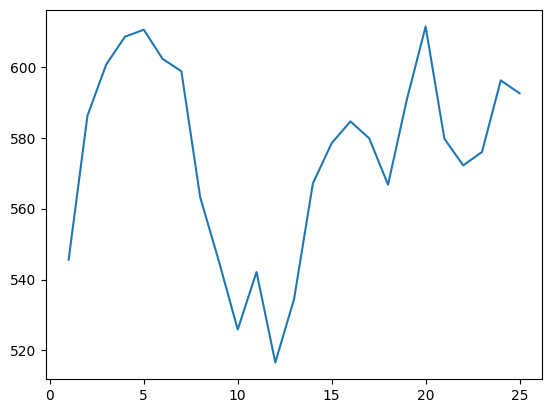

In [ ]:
#3 degree polynomial
def func(x,a,b,c,d):
  return a*x**3 + b*x**2 + c*x + d;

xData=np.array(X)
yData=np.array(Y)

plt.plot(xData, yData, label='Price vs week')

In [ ]:
global popt
popt, pcov = curve_fit(func, xData, yData)
print("The optimised parameters are: ",popt)

The optimised parameters are:  [ 1.46708925e-03  1.84602027e-01 -5.43028547e+00  5.98629011e+02]


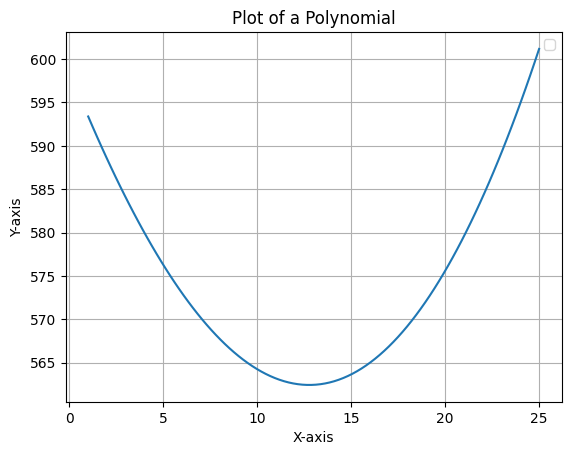

In [ ]:
# Define the polynomial function
def polynomial1(x):
    return popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3];

# Generate x values
x_values = np.linspace(1, 25, 100)

# Calculate y values using the polynomial function
y_values = polynomial1(x_values)

# Plot the polynomial
plt.plot(x_values, y_values)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of a Polynomial')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [ ]:
#10 degree polynomial
def func2(x,a,b,c,d,e,f,g,h,i,j,k):
  return a*x**10 + b*x**9 + c*x**8 + d*x**7 + e*x**6 + f*x**5 + g*x**4 + h*x**3 + i*x**2 + j*x + k

global popt2
popt2, pcov2 = curve_fit(func2, xData, yData)
print("The optimised parameters are: ",popt2)


The optimised parameters are:  [-5.22051316e-08  6.95806076e-06 -3.98955852e-04  1.28547625e-02
 -2.55025308e-01  3.20958971e+00 -2.54967405e+01  1.23905368e+02
 -3.49421266e+02  5.24274732e+02  2.68373483e+02]


In [ ]:
print(popt2[0])

-5.2205131634877097e-08


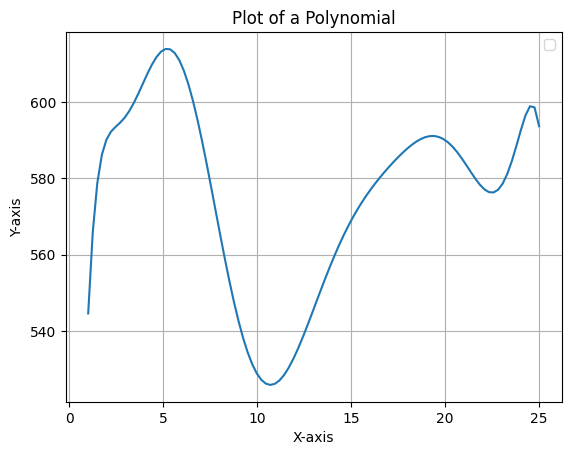

In [ ]:
# Define the polynomial function
def polynomial(x):
    return popt2[0]*x**10 + popt2[1]*x**9 + popt2[2]*x**8 + popt2[3]*x**7 + popt2[4]*x**6 + popt2[5]*x**5 + popt2[6]*x**4 + popt2[7]*x**3 + popt2[8]*x**2 + popt2[9]*x + popt2[10];

# Generate x values
x_values2 = np.linspace(1, 25, 100)

# Calculate y values using the polynomial function
y_values2 = polynomial(x_values2)

# Plot the polynomial
plt.plot(x_values2, y_values2)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of a Polynomial')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Comparing the 3 graphs

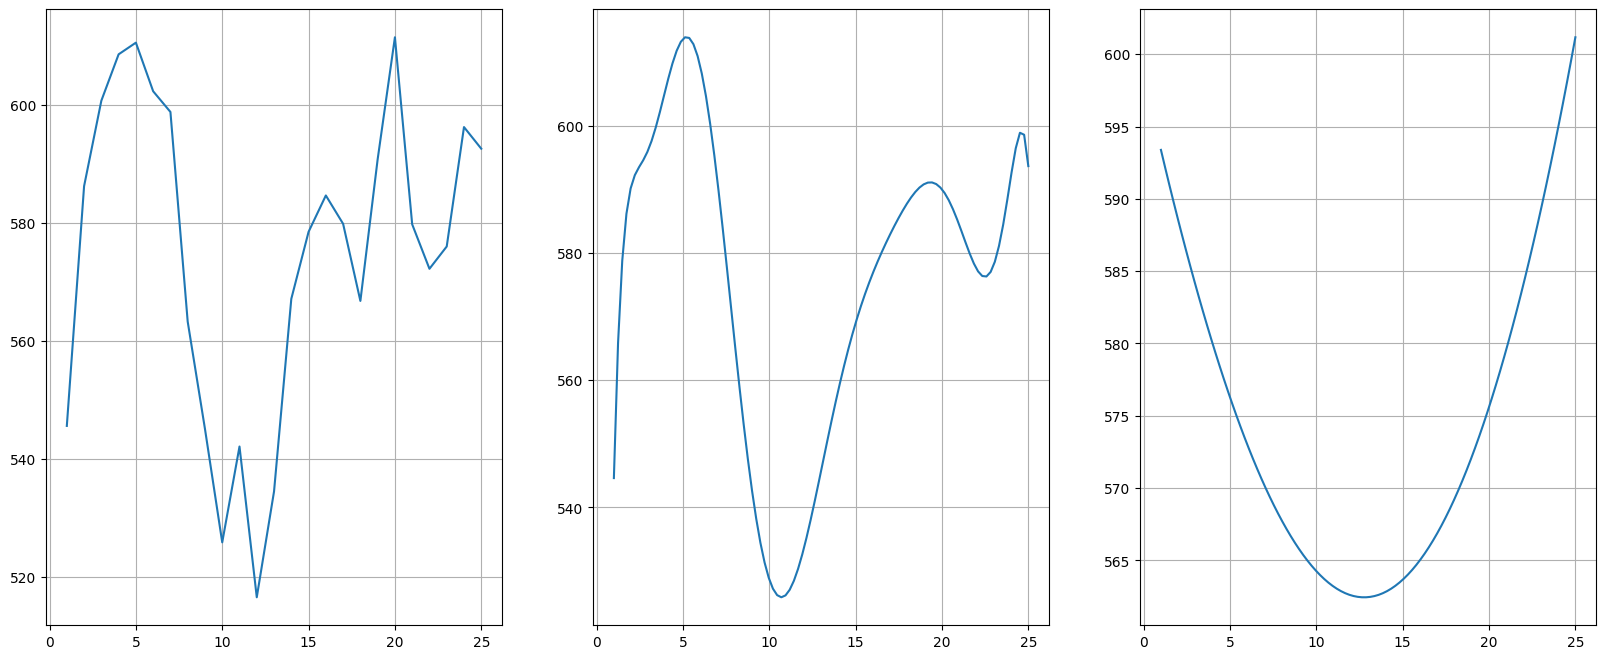

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.plot(xData, yData, label='Price vs week')
plt.grid()
plt.subplot(1,3,2)
plt.plot(x_values2, y_values2)
plt.grid()
plt.subplot(1,3,3)
plt.plot(x_values, y_values)
plt.grid()




In [ ]:
print("Prediction of average close price of 26th time interval")
print("by 10-degree curve: ",polynomial(26))
print("by 3 degree cruve: ", polynomial1(26))
print("Actual close price: 513.02")

Prediction of average close price of 26th time interval
by 10-degree curve:  457.03743288088384
by 3 degree cruve:  608.0181195490568
Actual close price: 513.02
